#Задание

##Цель: применить на практике базовые ансамблевые методы
**Описание задания:**

В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с [сайта](https://www.kaggle.com/fedesoriano/heart-failure-prediction). Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

In [ ]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

**1)Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)**

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**2)Подготовьте датасет к обучению моделей.**

a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

Посмотрим основую информацию о датафрейме и основные статистики

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Сделаем бинарное кодирование колонки Sex

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
data['Sex'] = le.fit_transform(data['Sex'])

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


Остальные колонки с типом данных object преобразуем через get_dummies

In [ ]:
data.select_dtypes('object').columns

Index(['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:
dummies = pd.get_dummies(data.select_dtypes('object'))

In [ ]:
dummies.head()

,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,0,0,1,0,1,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,1,0,1,0,0,0,1


Соберем итоговый датафрейм для обучения

In [ ]:
data.select_dtypes(['int','float']).columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'HeartDisease'],
      dtype='object')

In [ ]:
heart = pd.concat([data.select_dtypes(['int','float']),dummies], axis = 1)

In [ ]:
heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


**Атрибутивная информация:**

1) Возраст: возраст пациента [годы]

2) Пол: пол пациента [M: мужчина, F: женщина]

3) Тип рисунка груди: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]

4) RestingBP: артериальное давление в состоянии покоя [мм рт. ст.]

5) Холестерин: сывороточный холестерин [мм / дл]

6) Уровень сахара в крови натощак [1: если уровень сахара в крови натощак> 120 мг / дл, 0: в противном случае]

7) Электрокардиограмма в покое: результаты электрокардиограммы в покое [Нормальный: нормальный, ST: аномалия зубца ST-T (инверсия зубца T и / или подъем или депрессия ST> 0,05 мВ),
ГЛЖ: показывает вероятную или определенную гипертрофию левого желудочка по критериям Эстеса]

8) MaxHR: достигнутая максимальная частота сердечных сокращений 
[числовое значение от 60 до 202]

9) Стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]

10) Oldpeak: oldpeak = ST [Числовое значение, измеренное в депрессии]

11) ST_Slope: наклон сегмента ST при максимальной нагрузке [Вверх: наклон вверх, плоский: плоский, вниз: наклон вниз]

12) HeartDisease: выходной класс [1: болезнь сердца, 0: норма]

In [ ]:
data.select_dtypes(['int','float']).columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'HeartDisease'],
      dtype='object')

Построим график зависимости по всем возможным признакам

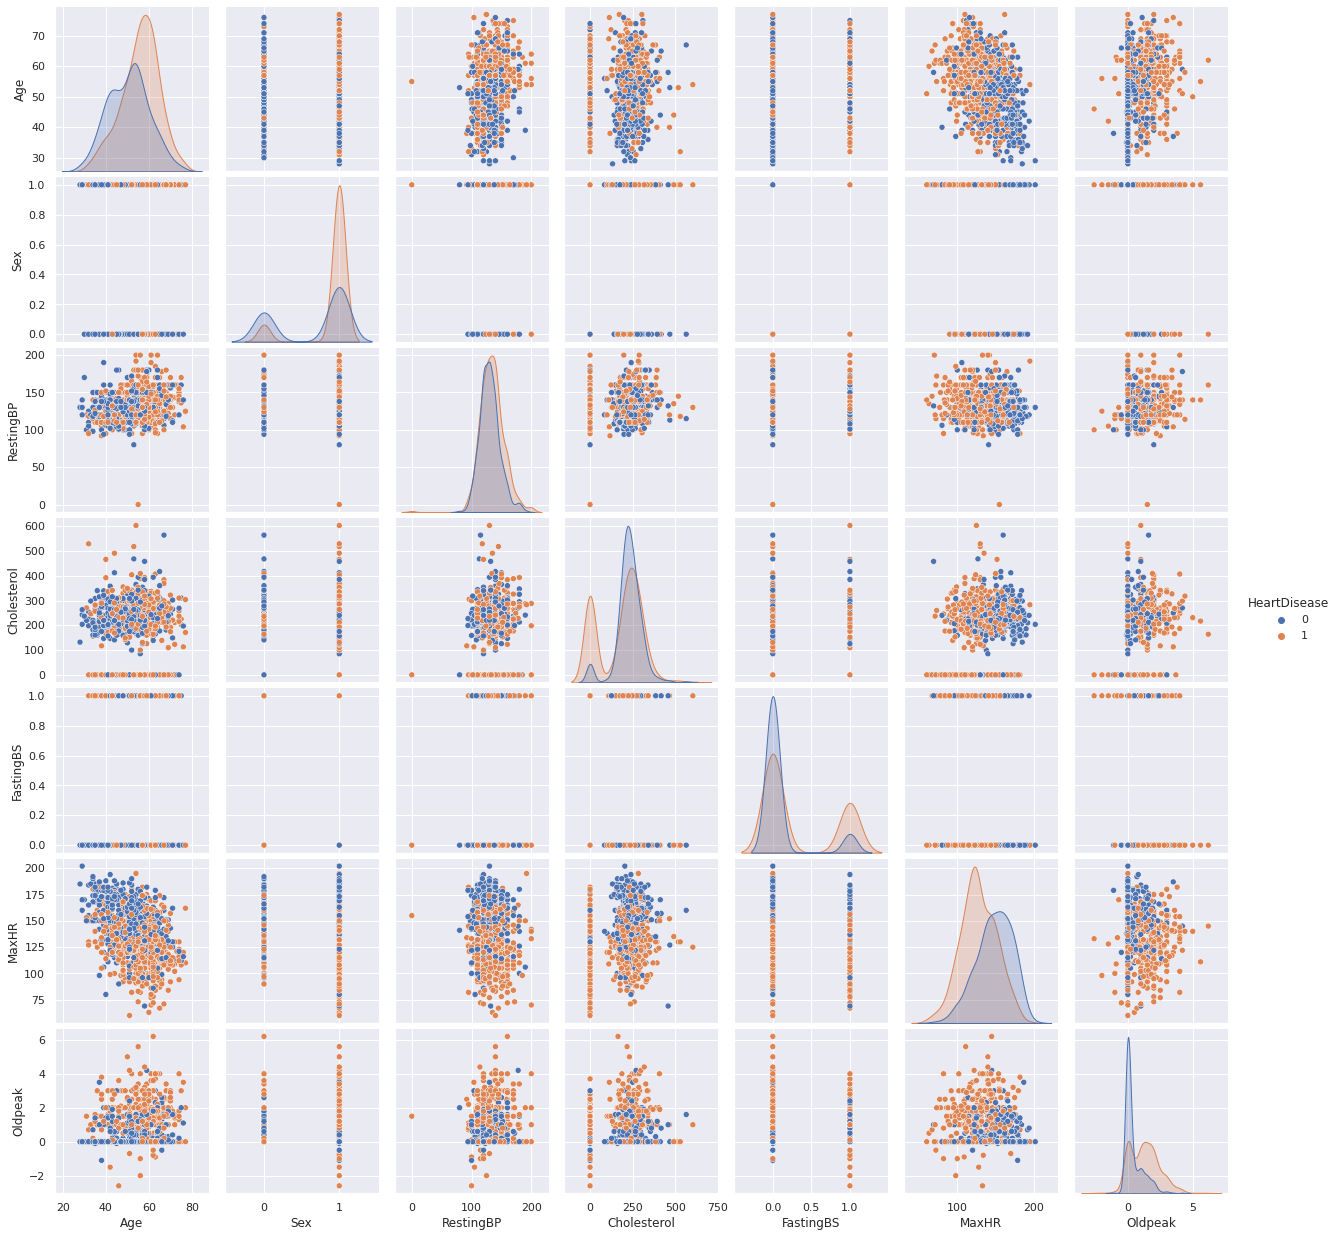

In [ ]:
sns.pairplot(data, hue = 'HeartDisease')

Попробуем с помощью визуализаций определить есть ли выбросы в данных

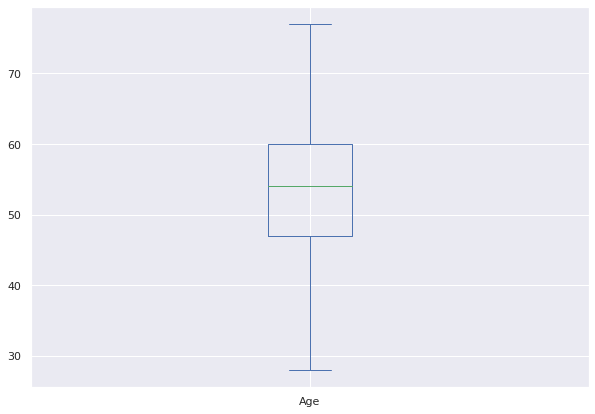

In [ ]:
heart['Age'].plot(kind='box')

Выбросов выбросов в колонке Age нет

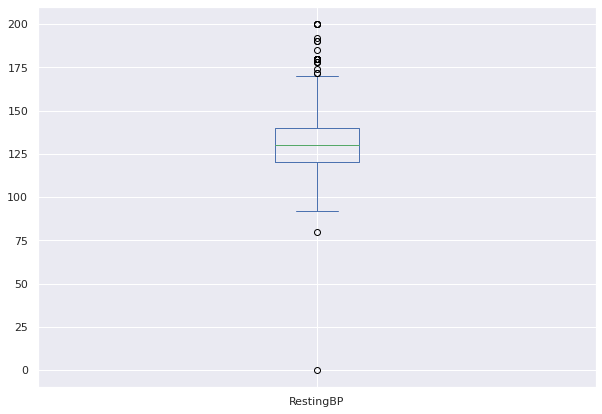

In [ ]:
heart['RestingBP'].plot(kind='box')

Видим что есть один выброс с арттериальным давлением 0. Такого быть не должно, если пациент живой

In [ ]:
heart[heart['RestingBP'] == 0]

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
449,55,1,0,0,0,155,1.5,1,0,0,1,0,0,1,0,1,0,0,1,0


Как видим у данного пациента, отсутствуют и другие значения, так как он единственный, то данную строку просто удалим

In [ ]:
heart =  heart[heart['RestingBP'] != 0]

In [ ]:
heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


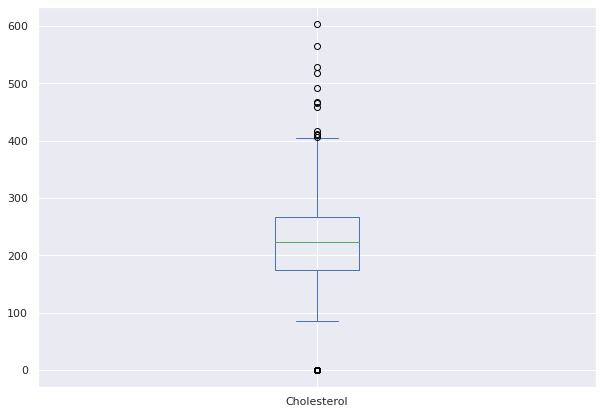

In [ ]:
heart['Cholesterol'].plot(kind='box')

In [ ]:
heart[heart['Cholesterol'] == 0]

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
293,65,1,115,0,0,93,0.0,1,1,0,0,0,0,1,0,0,1,0,1,0
294,32,1,95,0,1,127,0.7,1,0,0,0,1,0,1,0,1,0,0,0,1
295,61,1,105,0,1,110,1.5,1,1,0,0,0,0,1,0,0,1,0,0,1
296,50,1,145,0,1,139,0.7,1,1,0,0,0,0,1,0,0,1,0,1,0
297,57,1,110,0,1,131,1.4,1,1,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,122,0,0,120,0.5,1,1,0,0,0,0,1,0,1,0,0,0,1
515,63,1,130,0,1,160,3.0,0,0,0,1,0,0,0,1,1,0,0,1,0
518,48,1,102,0,1,110,1.0,1,0,0,1,0,0,0,1,0,1,1,0,0
535,56,1,130,0,0,122,1.0,1,1,0,0,0,1,0,0,0,1,0,1,0


Нулевые значения скорее всего соответствуют очень низкому уровню холестирина, так как таких данных много, то лучше их оставить без изменений 

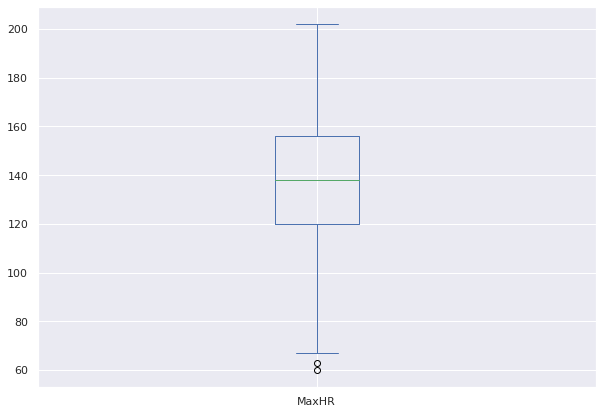

In [ ]:
heart['MaxHR'].plot(kind='box')

В колонке MaxHR выбросов нет 

In [ ]:
heart.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,0.789531,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890,0.540894,0.188659,0.220284,0.050164,0.205016,0.600872,0.194111,0.595420,0.404580,0.068702,0.500545,0.430752
std,9.437636,0.407864,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466,0.498597,0.391451,0.414664,0.218401,0.403934,0.489986,0.395731,0.491078,0.491078,0.253085,0.500273,0.495452
min,28.000000,0.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Выдвенем две гипотезы. Первая - мужчины чаще подвержены сердечным заболеваниям. Вторая - сердечные заболевания более чаще встречаются у пожилых людей. Проверим их на графиках

In [ ]:
heart_sns = heart[['Age','Sex','HeartDisease']]

In [ ]:
heart_sns['Sex'] = heart_sns['Sex'].apply(lambda x: 'female' if x == 0 else 'male')

<ipython-input-80-e4325c4f24bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_sns['Sex'] = heart_sns['Sex'].apply(lambda x: 'female' if x == 0 else 'male')


In [ ]:
heart_sns['HeartDisease'] = heart_sns['HeartDisease'].apply(lambda x: 'Heart Disease' if x == 1 else 'No Heart Disease')

<ipython-input-81-c98860bdc29a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_sns['HeartDisease'] = heart_sns['HeartDisease'].apply(lambda x: 'Heart Disease' if x == 1 else 'No Heart Disease')


In [ ]:
heart_sns.head()

,Age,Sex,HeartDisease
0,40,male,No Heart Disease
1,49,female,Heart Disease
2,37,male,No Heart Disease
3,48,female,Heart Disease
4,54,male,No Heart Disease


Text(0.5, 1.0, 'Количество заболеваний сердца в зависимости от пола')

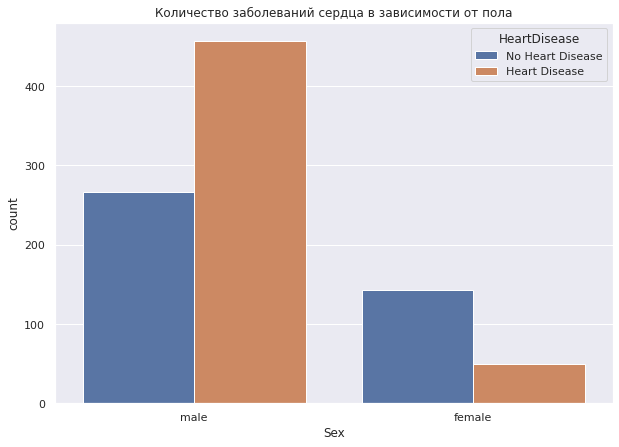

In [ ]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x= 'Sex', hue = 'HeartDisease', data = heart_sns)
plt.title('Количество заболеваний сердца в зависимости от пола')

По данному графику видно, что у мужчин чаще встречаются сердечные заболевания

In [ ]:
# функция разбивает возраст на категории по классификации Всемирной организации здравоохранения
def age_category(x):
  res = ''
  if x < 45:
    res = 'Молодой возраст'
  if 60 > x > 44:
    res = 'Средний возраст' 
  if 75 > x > 59:
    res = 'Пожилой возраст'
  if 90 > x > 74:
    res = 'Старческий возраст'
  if x > 89:
    res = 'Долгожитель'
  return res   


In [ ]:
heart_sns['Age_category'] = heart_sns['Age'].apply(age_category)

<ipython-input-85-dd087d51a132>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_sns['Age_category'] = heart_sns['Age'].apply(age_category)


Text(0.5, 1.0, 'Количество заболеваний сердца в зависимости от возраста')

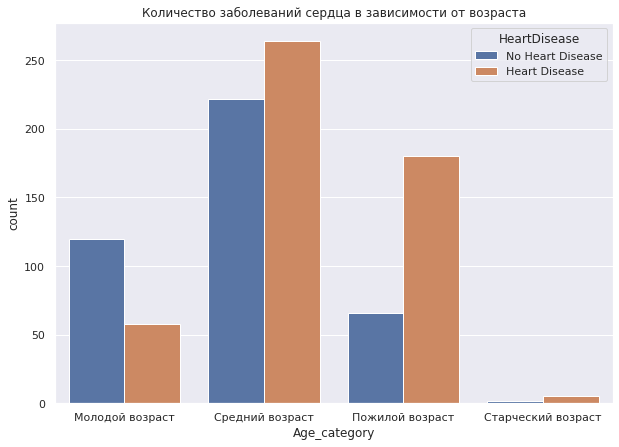

In [ ]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x= 'Age_category', hue = 'HeartDisease', data = heart_sns)
plt.title('Количество заболеваний сердца в зависимости от возраста')

По графику видно, что люди начиная со среднего возваста(от 45 лет), начинаю чаще страдать сердечными заболеваниями 

**3)Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.**

In [ ]:
heart.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'HeartDisease', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
X = heart[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak','ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']]

In [ ]:
y = heart['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4)Обучите дерево решений на обучающем множестве.**

Используйте следующие модели:

a) tree.DecisionTreeClassifier

b) ensemble.RandomForestClassifier

***DecisionTreeClassifier***

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

***RandomForestClassifier***

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**5)Для тестового множества сделайте предсказание целевой переменной.** 

Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [ ]:
predict_dct = dtc.predict(X_test) # предсказание DecisionTreeClassifier

In [ ]:
predict_rfc = rfc.predict(X_test) # предсказание RandomForestClassifier

In [ ]:
print(classification_report(y_test, predict_dct,
                          target_names= ['NO Heart Disease', 'Heart Disease'])) # метрики DecisionTreeClassifier

                  precision    recall  f1-score   support

NO Heart Disease       0.77      0.83      0.80        72
   Heart Disease       0.89      0.84      0.86       112

        accuracy                           0.84       184
       macro avg       0.83      0.84      0.83       184
    weighted avg       0.84      0.84      0.84       184



In [ ]:
print(classification_report(y_test, predict_rfc,
                          target_names= ['NO Heart Disease', 'Heart Disease'])) # метрики RandomForestClassifier

                  precision    recall  f1-score   support

NO Heart Disease       0.81      0.88      0.84        72
   Heart Disease       0.92      0.87      0.89       112

        accuracy                           0.87       184
       macro avg       0.86      0.87      0.86       184
    weighted avg       0.87      0.87      0.87       184



**6)Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.**

In [ ]:
imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending= True)

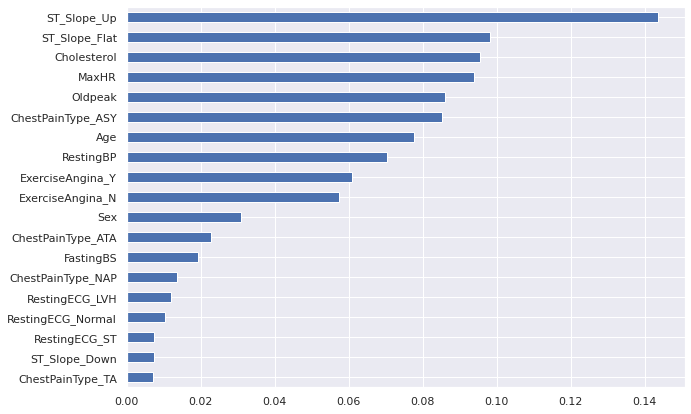

In [ ]:
imp.plot(kind = 'barh')

**7) Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.**

a) Повторите п. 5

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=20,
                            random_state=42)

In [ ]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  random_state=42)

In [ ]:
predict_bagging = bagging.predict(X_test)

In [ ]:
print(classification_report(y_test, predict_bagging,
                          target_names= ['NO Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

NO Heart Disease       0.83      0.88      0.85        72
   Heart Disease       0.92      0.88      0.90       112

        accuracy                           0.88       184
       macro avg       0.87      0.88      0.88       184
    weighted avg       0.88      0.88      0.88       184



**8) Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.**

a) Повторите п. 5

In [ ]:
estimators = [('dtc',DecisionTreeClassifier(random_state=42)),
              ('rfc', RandomForestClassifier(random_state=42)),
              ('lsvc',LinearSVC(random_state=42))]

In [ ]:
stacking = StackingClassifier(estimators=estimators, final_estimator= LinearSVC())

In [ ]:
stacking.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('lsvc', LinearSVC(random_state=42))],
                   final_estimator=LinearSVC())

In [ ]:
predict_stacking = stacking.predict(X_test)

In [ ]:
print(classification_report(y_test, predict_stacking,
                          target_names= ['NO Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

NO Heart Disease       0.73      0.92      0.81        72
   Heart Disease       0.94      0.78      0.85       112

        accuracy                           0.83       184
       macro avg       0.83      0.85      0.83       184
    weighted avg       0.85      0.83      0.83       184



**9) Сформулируйте выводы по проделанной работе.**

a) Сравните метрики построенных моделей.

b) Напишите свое мнение, какая модель наилучшая и почему.

Лучшие метрики у модели bagging. Получается что в данных реализациях она лучшая. А какая модель наилучшая я бы не стал определять на данном этапе , возможно, если попробовать использовать разные параметры моделей и реализации, метрики у другой модели могли бы быть лучше и для разных задач лучшими могут быть разные модели.